In [3]:
%run Methods.ipynb

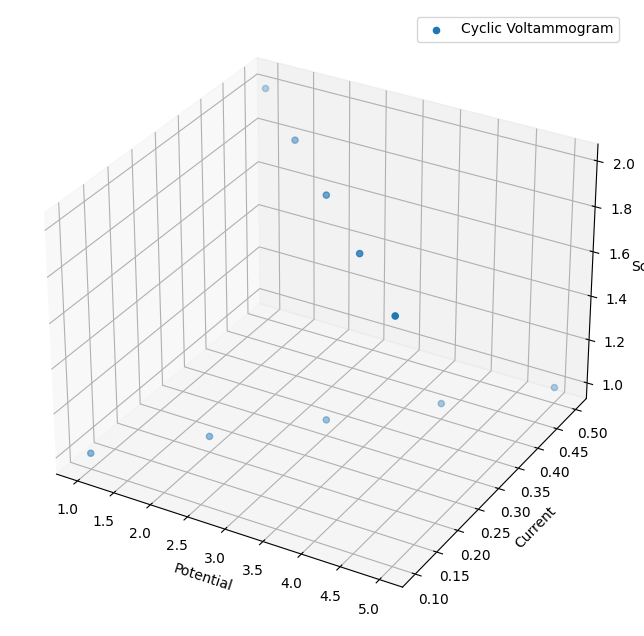

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Replace this with your actual DataFrame
# Sample data creation for demonstration purposes
data = {'potential': [1, 2, 3, 4, 5, 1, 2, 3, 4, 5],
        'current': [0.1, 0.2, 0.3, 0.4, 0.5, 0.5, 0.4, 0.3, 0.2, 0.1],
        'scan': [1, 1, 1, 1, 1, 2, 2, 2, 2, 2]}

df = pd.DataFrame(data)

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
ax.scatter(df['potential'], df['current'], df['scan'], label='Cyclic Voltammogram')

# Set labels
ax.set_xlabel('Potential')
ax.set_ylabel('Current')
ax.set_zlabel('Scan')

# Add a legend
ax.legend()

# Show the plot
plt.show()


In [6]:
#(De)lithiation current for LMO 90 nm
area = 0.7854 # cm2
thickness = 90
q_th = 2268 * area * thickness *1e-7
delith_current = q_th / 3600

q_th
delith_current

4.453217999999999e-06

In [28]:
### LMO_N_1 RUN 1
path = r'C:\Users\lopezb41\OneDrive - imec\Documents\Experiments\Data\Electrochemical\2024\24LSB03\LMO_N_1\1'
area = np.pi * (0.5 **2) # cm2
thickness = 90
setup_files(path)
name = 'LMO_N_1'
lmo_n_1 = cc(path, area, thickness, name)
# cc_plot(lmo_n_1, color_map, 100)
# dq_dv_plot(lmo_n_1, color_map, 100)


In [13]:
import shutil
import os

def copy_files(source_folder, destination_folder):
    try:
        for item in os.listdir(source_folder):
            source_path = os.path.join(source_folder, item)
            destination_path = os.path.join(destination_folder, item)

            if os.path.exists(destination_path):
                print(f"Skipping {item} - File already exists in the destination folder.")
                continue

            if os.path.isdir(source_path):
                shutil.copytree(source_path, destination_path)
            else:
                shutil.copy2(source_path, destination_path)

        print(f"Files copied from {source_folder} to {destination_folder}")
    except Exception as e:
        print(f"An error occurred: {e}")


source_folder = r'\\winbe\estore\PhD Data\Rodrigo\Electrochemical\24LSB03'  # Replace with your source folder path
destination_folder = r'C:\Users\lopezb41\OneDrive - imec\Documents\Experiments\Data\Electrochemical\2024\24LSB03'  # Replace with your destination folder path


copy_files(source_folder, destination_folder)


Skipping Full lithiation - File already exists in the destination folder.
Skipping LMO_N_1 - File already exists in the destination folder.
Skipping LMO_N_2 - File already exists in the destination folder.
Files copied from \\winbe\estore\PhD Data\Rodrigo\Electrochemical\24LSB03 to C:\Users\lopezb41\OneDrive - imec\Documents\Experiments\Data\Electrochemical\2024\24LSB03


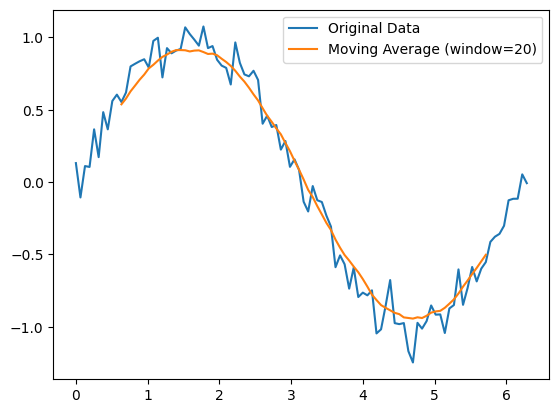

In [98]:

# Generate example data with noise
x = np.linspace(0, 2 * np.pi, 100)
y = np.sin(x) + 0.1 * np.random.randn(100)

# Apply moving average filter
window_size = 20
y_smooth_ma = pd.Series(y).rolling(window=window_size, center=True).mean().values

# Plot the original and smoothed data
plt.plot(x, y, label='Original Data')
plt.plot(x, y_smooth_ma, label=f'Moving Average (window={window_size})')
plt.legend()
plt.show()

In [32]:
crates = [1, 2, 5, 10, 20, 50, 100]
times = [3600/i for i in crates]
a  = np.random.permutation(times)
a

array([1800.,  360.,  180., 3600.,   72.,   36.,  720.])

In [2]:
tio2_mw = 79.866 #g/mol
tio2_density = 4.23
n = 0.5
qth_tiO2_grav = q_th_grav(n, tio2_mw)
qth_tio2_vol = q_th_vol(n, tio2_mw, tio2_density)
print(f'{round(qth_tiO2_grav)} mAh/g', f'{round(qth_tio2_vol)} mAh/cm3')

thick = 9e-7
vol = np.pi * thick
charge = 4.61e-3
cap = charge / (3.6 * vol)
cap * 100 / 710 # ~ 64% theoretical capacity

168 mAh/g 710 mAh/cm3


63.78927905178556

In [5]:
mw = 859.23 # g/mol
qth_prussian = q_th_grav(2, mw)
print(f'{round(qth_prussian)} mAh/g')

62 mAh/g
